<a href="https://colab.research.google.com/github/Varshapogula/CodeTechItSolutions/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

Loading the Data

In [3]:
varsha = pd.read_csv("/content/creditcard.csv")
varsha

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,...,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0


Understanding the Data

In [4]:
varsha.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Describing the Data

In [5]:
print(varsha.shape)
print(varsha.describe())

(45646, 31)
               Time            V1            V2            V3            V4  \
count  45646.000000  45646.000000  45646.000000  45646.000000  45646.000000   
mean   27545.441331     -0.237544      0.028942      0.696718      0.191505   
std    12907.770469      1.886548      1.613070      1.530553      1.403936   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    19891.000000     -0.985248     -0.543868      0.222804     -0.714566   
50%    32447.000000     -0.246259      0.088873      0.801638      0.191835   
75%    37571.750000      1.157412      0.739723      1.434911      1.070924   
max    42437.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  45646.000000  45645.000000  45645.000000  45645.000000  45645.000000   
mean      -0.248407      0.098588     -0.117937      0.053331      0.157893   
std        1.414608      1.308548      

Imbalance in the data

In [6]:
fraud = varsha[varsha['Class'] == 1]
valid = varsha[varsha['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(varsha[varsha['Class'] == 1])))
print('Valid Transactions: {}'.format(len(varsha[varsha['Class'] == 0])))

0.003120673362195899
Fraud Cases: 142
Valid Transactions: 45503


Print the amount details for Fraudulent Transaction

In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     142.000000
mean       97.592183
std       233.185192
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

Print the amount details for Normal Transaction

In [9]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    45503.000000
mean        90.808470
std        240.322652
min          0.000000
25%          7.580000
50%         24.990000
75%         82.360000
max       7879.420000
Name: Amount, dtype: float64

Plotting the Correlation Matrix

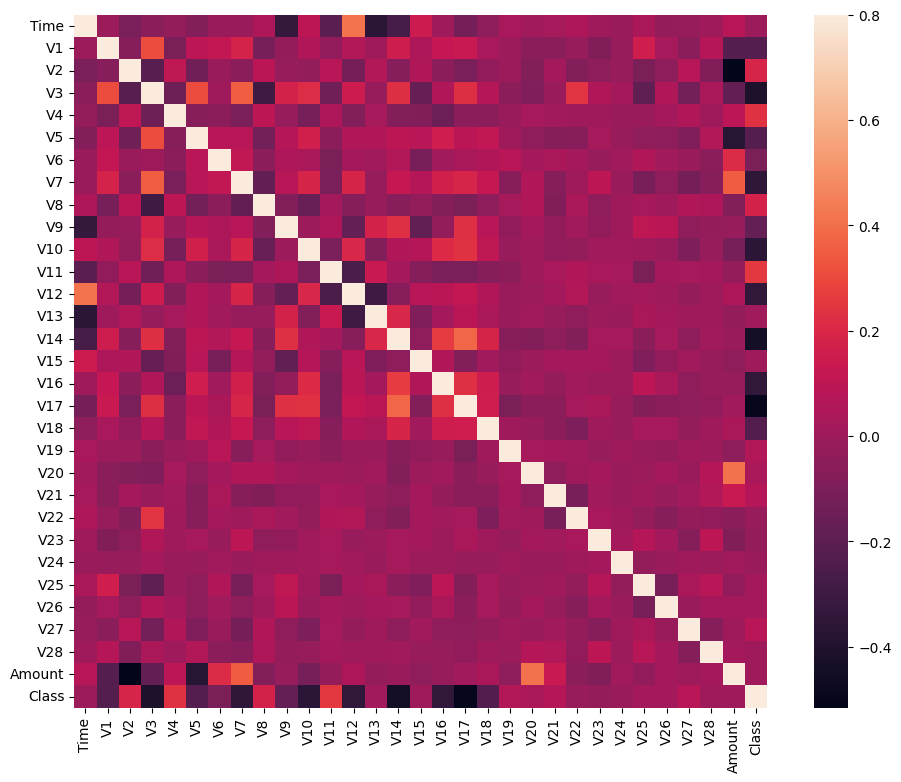

In [19]:
corrmat = varsha.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Separating the X and the Y values

In [13]:
X = varsha.drop(['Class'], axis = 1)
Y = varsha["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(45646, 30)
(45646,)


Training and Testing Data Bifurcation

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

Building a Random Forest Model using scikit learn

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Check for NaN values in yTrain and replace them
nan_indices = np.isnan(yTrain)
if np.any(nan_indices):
    yTrain = np.nan_to_num(yTrain)

# Define and fit the imputer to your training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(xTrain)

# Transform both training and testing data
xTrain_imputed = imputer.transform(xTrain)
xTest_imputed = imputer.transform(xTest)

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain_imputed, yTrain)

# predictions
yPred = rfc.predict(xTest_imputed)

Building all kinds of evaluating parameters

In [23]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995618838992333
The precision is 0.9655172413793104
The recall is 0.9032258064516129
The F1-Score is 0.9333333333333333
The Matthews correlation coefficient is0.9336360526069319


Visualizing the Confusion Matrix

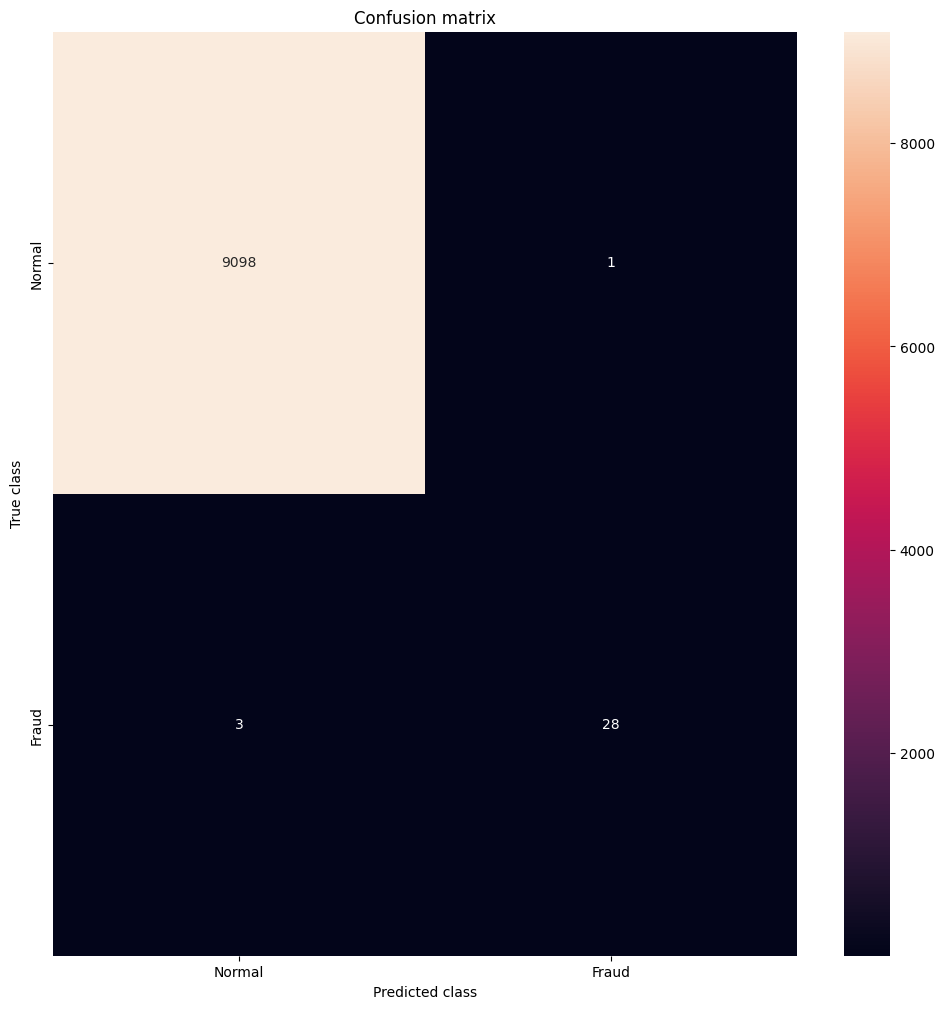

In [24]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()